In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Input
from keras.models import Model

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence 

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
from keras.datasets import mnist

In [3]:
# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# MNist 데이터를 불러온다.
(X_train, _), (X_test, _) = mnist.load_data()

In [5]:
# 데이터 표준화 작업
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [6]:
# 모델 생성
model = Sequential()

In [7]:
# 인코딩 부분 - 입력값의 차원을 축소
model.add(Conv2D(16, kernel_size=3, padding='same', 
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(8, kernel_size=3, strides=2, padding='same', 
                 activation='relu'))

In [8]:
# 디코딩 - 다시 차원을 점차 늘려 입력값과 똑같은 크기의 출력값을 내보냄
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(UpSampling2D())
model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [9]:
# 전체 구조를 확인한다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [10]:
# 학습한다.
model.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
model.fit(X_train, X_train, validation_data=(X_test, X_test),
         epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 8s 7ms/step - loss: 0.3019 - val_loss: 0.1394
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1327 - val_loss: 0.1176
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1153 - val_loss: 0.1089
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1083 - val_loss: 0.1035
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1044 - val_loss: 0.1010
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1016 - val_loss: 0.0992
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0995 - val_loss: 0.0977
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0963 - val_loss: 0.0943
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0955 - val_loss: 0.0931

In [13]:
# 랜덤하게 5개의 이미지를 추출한다
random_test = np.random.randint(X_test.shape[0], size=5)
# print(random_test)

# 예측 이미지 생성
ae_imgs = model.predict(X_test)

In [14]:
# 출력될 이미지의 크기
plt.figure(figsize=(7, 2))

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

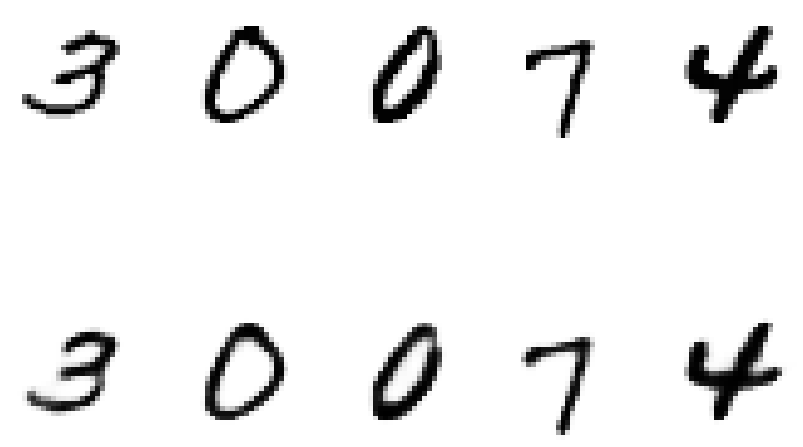

In [16]:
for i, image_idx in enumerate(random_test):
    # 원본
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    # 예측
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')    
    
plt.show()

- GAN : 정밀한 이미지 생성 가능, 학습량이 많음 -> 이미지 학습시 이용
- AutoEncoder : 정밀하지는 않지만 학습량이 적음 -> 주로 문자 학습시 이용